# HW3 : Logistic Regression and Neural Networks

### Instructions

The authoritative HW3 instructions are on the course website:

http://www.cs.tufts.edu/cs/135/2025s/hw3.html

Please report any questions to Piazza.

### Outline of this Notebook



In [121]:
import os
import numpy as np
import pandas as pd
import time
import warnings

In [122]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.0, style='whitegrid')

Allow autoreload of student-edited code to be reflected in this notebook

In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import LRGradientDescent 

insert_final_col_of_all_ones = LRGradientDescent.insert_final_col_of_all_ones
LogisticRegressionGradientDescent = LRGradientDescent.LogisticRegressionGradientDescent

# Create toy dataset with F=1 input dimension

Each input $x_n$ is one position on number line

Each label $y_n$ is binary, either 0 or 1

In [125]:
# Toy problem 
# Logistic regression should be able to perfectly predict all 10 examples
N = 10
xoffset = 1.23
x_NF = xoffset + np.hstack([
    np.linspace(-2, -1, 5), np.linspace(1, 2, 5)])[:,np.newaxis]
y_N = np.hstack([np.zeros(5), np.ones(5)])


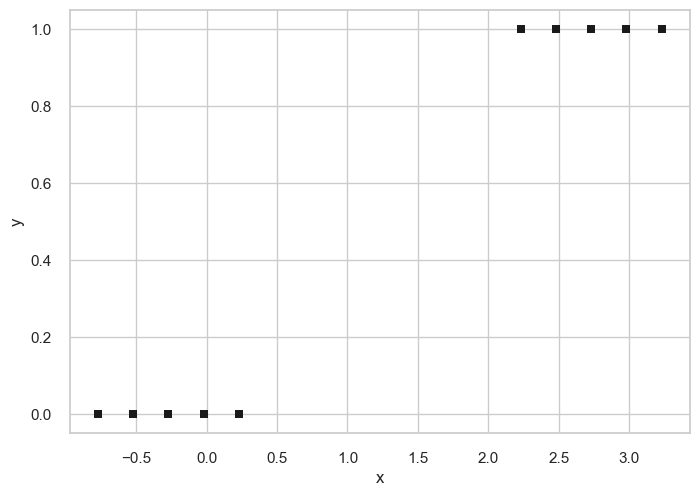

In [126]:
plt.plot(x_NF[:,0], y_N, 'ks');
plt.xlabel('x');
plt.ylabel('y');

## Setup 

In [127]:
fixedb = -1.0 # Fix bias coef at -1 for now, we'll learn it later in 1B

xone_NG = insert_final_col_of_all_ones(x_NF)

## Debugging Figure: Show phat as function of x for different w

You don't need this for your report, but this is for your *understanding* to make sure your predict_proba is correct

No need to edit here. Read thru to understand this code and what it's doing. 
Then use it to help debug your `predict_proba` implementation

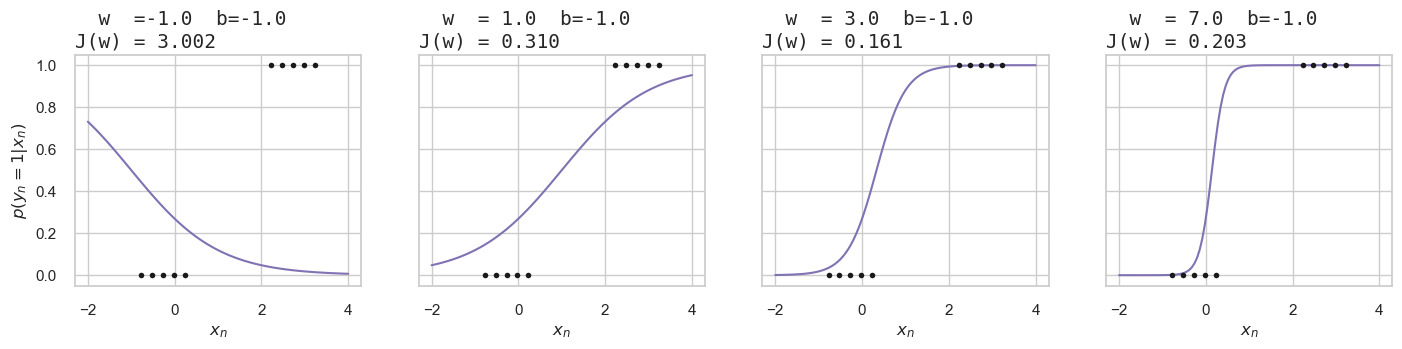

In [128]:
w_candidates_A = [-1., 1, 3, 7]

A = len(w_candidates_A)
fig, axgrid = plt.subplots(nrows=1, ncols=A, figsize=(4*A+1,3), sharex=True, sharey=True)

L = 101
xdense_L = np.linspace(-2, 4, L)
xdense_L1 = xdense_L[:,np.newaxis]

tmplr = LogisticRegressionGradientDescent(C=1000.0)

for aa in range(len(w_candidates_A)):
    curw = w_candidates_A[aa]
    
    # Hard-code the values of wtil_G so they reflect current w value
    tmplr.wtil_G = np.asarray([curw, fixedb]);
    
    # Evaluate phat with current wtil_G, across L different dense x values
    phat_L = tmplr.predict_proba(xdense_L1)[:,1]

    # Show predicted phat probability alongside true labels
    axgrid[aa].plot(xdense_L, phat_L, 'm-');
    axgrid[aa].plot(x_NF[:,0], y_N, 'k.', markersize=8);
    
    # Make pretty title to help with debugging
    curJ = tmplr.calc_loss(tmplr.wtil_G, xone_NG, y_N)
    panel = axgrid[aa]
    panel.set_title('  w  =% .1f  b=%.1f\nJ(w) = %.3f ' % (curw, fixedb, curJ),
                         x=0.0,
                         font='monospace', fontsize=14,
                         horizontalalignment='left')
    panel.set_xticks([-2, 0, 2, 4]);
    panel.set_xlabel(r'$x_n$')
    if aa == 0:
        panel.set_ylabel(r'$p(y_n=1 | x_n)$');

## Step 1A: Evaluate loss and grad across dense grid of w values

This prepares for Fig 1a

In [129]:
fixedb = -1.0 # Fix bias coef

In [130]:
xone_NG = insert_final_col_of_all_ones(x_NF)
G = xone_NG.shape[1]

In [131]:
mylr = LogisticRegressionGradientDescent(C=10.0)

In [132]:
## Perform numerical search over a fine grid of w values
H = 201 # num grid points
w_grid_H = np.linspace(-2, 11, H)
loss_grid_H = np.zeros_like(w_grid_H)
grad_grid_H = np.zeros_like(w_grid_H)

for hh in range(H):
    wtil_G = np.asarray([w_grid_H[hh], fixedb])
    loss = tmplr.calc_loss(wtil_G, xone_NG, y_N)
    grad_G = tmplr.calc_grad(wtil_G, xone_NG, y_N)
    loss_grid_H[hh] = loss
    grad_grid_H[hh] = grad_G[0]


## Figure 1a: Loss and Grad vs w

If your calc_loss and calc_grad implementations are correct, you shouldn't need to edit anything in this block

This block helps visualize loss J and its grad as a function of w

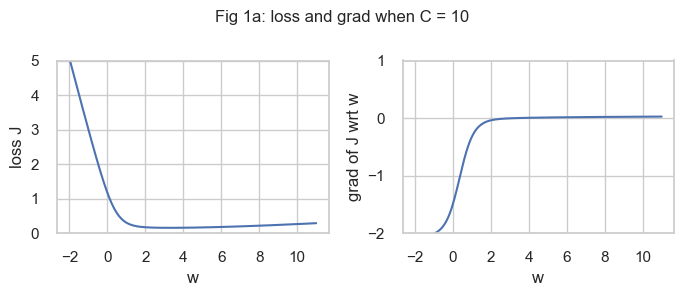

In [133]:
fig, axgrid = plt.subplots(nrows=1, ncols=2, figsize=(7,3), sharex=True, sharey=False)

loss_panel = axgrid[0]
loss_panel.plot(w_grid_H, loss_grid_H, 'b-');
loss_panel.set_ylim([0.0, 5.0]);
loss_panel.set_xticks([-2, 0, 2, 4, 6, 8, 10]);
loss_panel.set_xlabel('w')
loss_panel.set_ylabel('loss J')

grad_panel = axgrid[1]
grad_panel.plot(w_grid_H, grad_grid_H, 'b-');
grad_panel.set_ylim([-2, 1]);
grad_panel.set_yticks([-2, -1, 0, 1]);
grad_panel.set_xlabel('w')
grad_panel.set_ylabel('grad of J wrt w')

plt.suptitle("Fig 1a: loss and grad when C = %.3g" % mylr.C, fontsize=12);

plt.tight_layout();

## Caption of Fig 1a: Part 1

Write in report. See instructions.

## Caption of Fig 1a: Part 2

TODO find the values in w_grid_H that correspond to lowest loss value in loss_grid_H 

Make sure the answer here gets moved to your report

In [134]:
min_i = np.argmin(loss_grid_H)

if min_i > 0 and min_i < len(w_grid_H) - 1:
    lower_bound = w_grid_H[min_i - 1]
    upper_bound = w_grid_H[min_i + 1]
else:
    lower_bound = w_grid_H[min_i] - 0.01
    upper_bound = w_grid_H[min_i] + 0.01

print("Lowest value is between %.3f and %.3f" % (lower_bound, upper_bound))

Lowest value is between 3.200 and 3.330


## Step 1B

Using this toy data, `init_w_recipe='zeros'` and call `fit` with an appropriate step size to run gradient descent. Be sure to verify convergence. If it doesn't converge, adjust your step size accordingly. 


In [135]:
step_size = 8

mylr_fromzeros = LogisticRegressionGradientDescent(
    C=50.0, step_size=step_size, num_iterations=1000, init_recipe='zeros')

mylr_fromzeros.fit(x_NF, y_N)

Initializing G=2 parameters in wtil_G via recipe: zeros
Running GD for up to 1000 iters with step_size 8
iter   0/1000  loss   1.000000  avg_abs_grad   0.541011  w   0.000 b   0.000
iter   1/1000  loss   0.483758  avg_abs_grad   0.124055  w   8.656 b   0.000
iter   2/1000  loss   0.213976  avg_abs_grad   0.069312  w   8.330 b  -1.659
iter   3/1000  loss   0.137246  avg_abs_grad   0.043813  w   8.058 b  -2.496
iter   4/1000  loss   0.107387  avg_abs_grad   0.032024  w   7.843 b  -2.982
iter   5/1000  loss   0.091701  avg_abs_grad   0.025635  w   7.658 b  -3.309
iter   6/1000  loss   0.081748  avg_abs_grad   0.021678  w   7.492 b  -3.553
iter   7/1000  loss   0.074649  avg_abs_grad   0.018989  w   7.337 b  -3.746
iter   8/1000  loss   0.069181  avg_abs_grad   0.017036  w   7.192 b  -3.904
iter   9/1000  loss   0.064740  avg_abs_grad   0.015548  w   7.053 b  -4.038
iter  10/1000  loss   0.060997  avg_abs_grad   0.014371  w   6.920 b  -4.153
iter  11/1000  loss   0.057755  avg_abs_grad   0

## Step 1B part two: trace plotting

Edit the function below to make sure you are plotting the history of your gradient descent run. 

Only lines marked TODO need to be edited.

Please don't mess with the styling or ylims if at all possible.
If you find yourself messing with those, it may indicate a bug.

In [136]:
def make_trace_plots(mylr, figsize=(11,3),
                    loss_ylims=[-0.01, 0.2],
                    grad_ylims=[-0.01, 0.2],
                    param_ylims=[-10, 12],
                    xtick_every=100):
    fig, axgrid = plt.subplots(nrows=1, ncols=3, figsize=figsize, sharex=True, sharey=False)
    loss_panel = axgrid[0]
    grad_panel = axgrid[1]
    param_panel = axgrid[2]
    
    try:
        xmax = max(mylr.trace_steps)
    except:
        xmax = 100
    
    loss_panel.plot(mylr.trace_steps, mylr.trace_loss, 'm')
    loss_panel.set_ylim(loss_ylims)
    loss_panel.set_xlabel('iter')
    loss_panel.set_ylabel('loss J')
    loss_panel.set_xticks(np.arange(0, xmax, xtick_every))
    
    grad_panel.plot(mylr.trace_steps, mylr.trace_grad_L1_norm, 'm')
    grad_panel.set_ylim(grad_ylims)
    grad_panel.set_xlabel('iter')
    grad_panel.set_ylabel('sum(abs(grad_G))')
    
    step_list = mylr.trace_steps
    w_list = [wtil_G[0] for wtil_G in mylr.trace_param] if mylr.trace_param else [0]
    b_list = [wtil_G[-1] for wtil_G in mylr.trace_param] if mylr.trace_param else [0]

    param_panel.plot(step_list, w_list, 'b', label='w')
    param_panel.plot(step_list, b_list, 'r', label='b')    
    param_panel.legend(loc='upper right')
    param_panel.set_xlabel('iter')
    param_panel.set_ylim(param_ylims)
    param_panel.set_ylabel('param. val.')
    
    plt.tight_layout()

## Figure 1b: Trace plots for from-zeros run

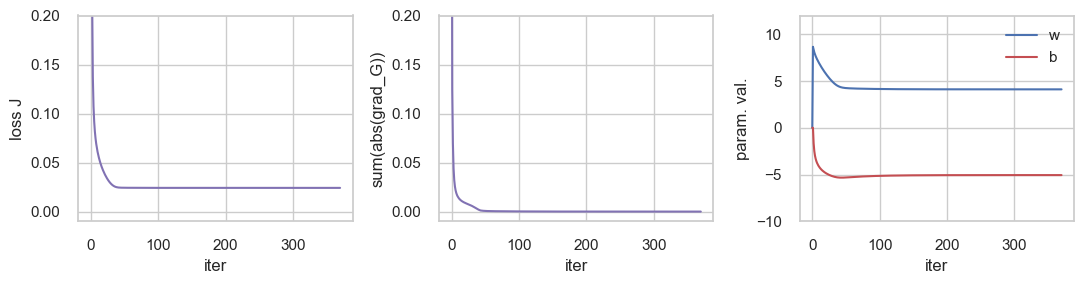

In [137]:
make_trace_plots(mylr_fromzeros)

TODO in your report: **In a brief caption**, indicate the `step_size` used and why you picked that value.


FYI as a bonus exercise for your own understanding, you could try calling fit using a different initialization (random), and compare the trace plots of that call to the ones above.

## Step 1C: Verify your implementation matches sklearn

Setup numpy so we print out arrays nicely to only 3 decimal places

In [138]:
def pprint_float(fval):
    return '% .3f' % fval

pretty_formatter = {'float': pprint_float}
np.set_printoptions(formatter=pretty_formatter)


In [139]:
import sklearn.metrics
from sklearn.linear_model import LogisticRegression

row_list = list()

for C in [500.0, 5.0, 0.005]:
    sklr = LogisticRegression(C=C, max_iter=999, solver='lbfgs', random_state=0)
    sklr.fit(x_NF, y_N)
    
    sklr_wtil_G = sklr.coef_.flatten().tolist() + [sklr.intercept_[0]]
    sklr_loss = np.mean(sklr.predict_proba(x_NF)[:, 1] - y_N) ** 2  

    row_dict = {'C': C, 'method': 'sklearn',
                'wtil_G': str(sklr_wtil_G),
                'loss': sklr_loss,
                'solver_status': 'converged' if sklr.n_iter_[0] < 999 else 'not converged'}
    row_list.append(row_dict)

    if C >= 100:
        step_size = 15.1648299564
    elif C >= 1:
        step_size = 10
    else:
        step_size = 0.05

    mylr = LogisticRegressionGradientDescent(
        C=C, 
        step_size=step_size,
        use_base2_for_BCE=False,
        num_iterations=999,
        verbose=False
    )
    mylr.fit(x_NF, y_N)

    mylr_wtil_G = mylr.wtil_G.tolist() if hasattr(mylr, 'wtil_G') else [0] * G
    mylr_loss = mylr.trace_loss[-1] if mylr.trace_loss else float('inf')

    row_dict = {'C': C, 'method': 'my code',
                'wtil_G': str(mylr_wtil_G),
                'loss': mylr_loss,
                'solver_status': mylr.solver_status}
    row_list.append(row_dict)

    print("C = %9.3f" % C)
    print(mylr.solver_status)

C =   500.000
Done. NOT converged after 999 iters with step_size 15.165
C =     5.000
Done. Converged after 127 iters with step_size 10
C =     0.005
Done. Converged after 380 iters with step_size 0.05


## Table 1c

In [140]:
# Convert the rows assembed above into a pandas DataFrame
df = pd.DataFrame(row_list)

Pretty print the pandas data frame as an HTML table.
You can copy this into your report.

In [141]:
pd.set_option('display.max_colwidth', 200)
from IPython.core.display import HTML
HTML(df.to_html(index=False))

C,method,wtil_G,loss,solver_status
500.000,sklearn,"[5.556228235899765, -6.832306569492877]",3.590497e-12,converged
500.000,my code,"[5.5577517852850296, -6.8384380912423115]",4.113868e-03,Done. NOT converged after 999 iters with step_size 15.165
5.000,sklearn,"[2.3602091695159095, -2.9032651096817492]",5.461187e-11,converged
5.000,my code,"[2.360277359363638, -2.9031411520177652]",9.463034e-02,Done. Converged after 127 iters with step_size 10
0.005,sklearn,"[0.03641937905713561, -0.04481792955138061]",3.045915e-11,converged
0.005,my code,"[0.03641296512102385, -0.04437852753429263]",6.794901e-01,Done. Converged after 380 iters with step_size 0.05


If needed, here's a plain text version of the table you could also include in your report.

In [142]:
print(df.to_string(index=False))

      C  method                                      wtil_G         loss                                             solver_status
500.000 sklearn     [5.556228235899765, -6.832306569492877] 3.590497e-12                                                 converged
500.000 my code   [5.5577517852850296, -6.8384380912423115] 4.113868e-03 Done. NOT converged after 999 iters with step_size 15.165
  5.000 sklearn   [2.3602091695159095, -2.9032651096817492] 5.461187e-11                                                 converged
  5.000 my code    [2.360277359363638, -2.9031411520177652] 9.463034e-02         Done. Converged after 127 iters with step_size 10
  0.005 sklearn [0.03641937905713561, -0.04481792955138061] 3.045915e-11                                                 converged
  0.005 my code [0.03641296512102385, -0.04437852753429263] 6.794901e-01       Done. Converged after 380 iters with step_size 0.05


### Short answer 1d

See instructions on webpage. Write answer in your report